# SALES PREDICTION OF CONTINENTAL

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6


In [43]:
sales = pd.read_csv(r'C:\Users\rajat\Documents\conti.csv')
sales['Year']=pd.to_datetime(sales['Year'],infer_datetime_format=True)
indexedSales=sales.set_index(['Year'])

In [44]:
from datetime import datetime
indexedSales.head(10)

,Sales
Year,
2009-01-01,20095.7
2010-01-01,26046.9
2011-01-01,30504.9
2012-01-01,32736.2
2013-01-01,33331.0
2014-01-01,34505.7
2015-01-01,39232.0
2016-01-01,40549.5
2017-01-01,44009.5


# SALES GRAPH FOR PAST 10 YEARS

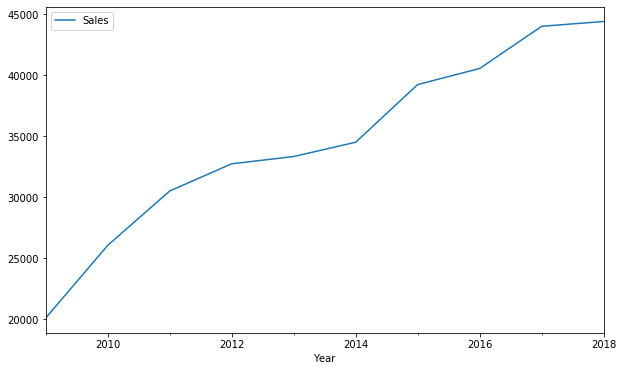

In [45]:
indexedSales.plot()

In [46]:
sales_diff=indexedSales.diff(periods=1)

In [47]:
sales_diff=sales_diff[1:]
sales_diff.head(9)

,Sales
Year,
2010-01-01,5951.2
2011-01-01,4458.0
2012-01-01,2231.3
2013-01-01,594.8
2014-01-01,1174.7
2015-01-01,4726.3
2016-01-01,1317.5
2017-01-01,3460.0
2018-01-01,394.9


# DIFFERENCE BETWEEN SALES PER YEAR

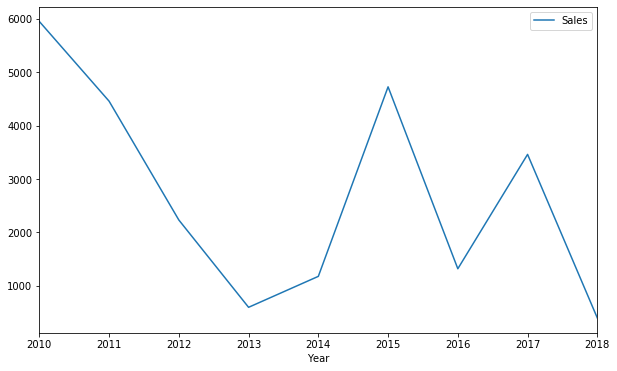

In [48]:
sales_diff.plot()

# DETERMINING ROLLING STATISTICS

In [49]:
rolmean=indexedSales.rolling(window=2).mean()
rolstd=indexedSales.rolling(window=2).std()
print(rolmean,rolstd)

               Sales
Year                
2009-01-01       NaN
2010-01-01  23071.30
2011-01-01  28275.90
2012-01-01  31620.55
2013-01-01  33033.60
2014-01-01  33918.35
2015-01-01  36868.85
2016-01-01  39890.75
2017-01-01  42279.50
2018-01-01  44206.95                   Sales
Year                   
2009-01-01          NaN
2010-01-01  4208.133876
2011-01-01  3152.282031
2012-01-01  1577.767361
2013-01-01   420.587113
2014-01-01   830.638336
2015-01-01  3341.998780
2016-01-01   931.613184
2017-01-01  2446.589463
2018-01-01   279.236468


# PLOTTING ROLLING STATISTICS

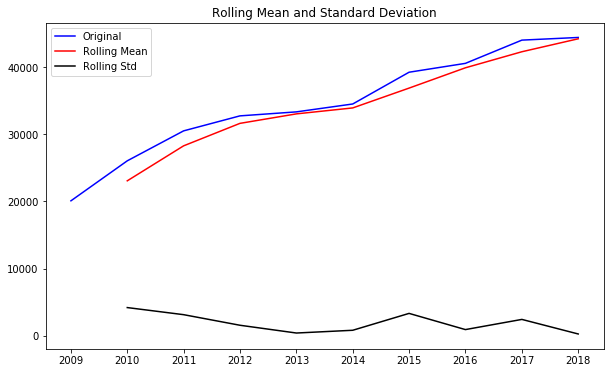

In [50]:
orig=plt.plot(indexedSales,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

# DICKEY-FULLER TEST

In [51]:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test : ')
dftest=adfuller(indexedSales['Sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-Value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value %s'%key] = value
print(dfoutput)

Result of Dickey-Fuller Test : 
Test Statistics               -0.206640
p-Value                        0.937725
#Lags Used                     2.000000
Number of Observations Used    7.000000
Critical Value 1%             -4.938690
Critical Value 5%             -3.477583
Critical Value 10%            -2.843868
dtype: float64


# ESTIMATED TREND

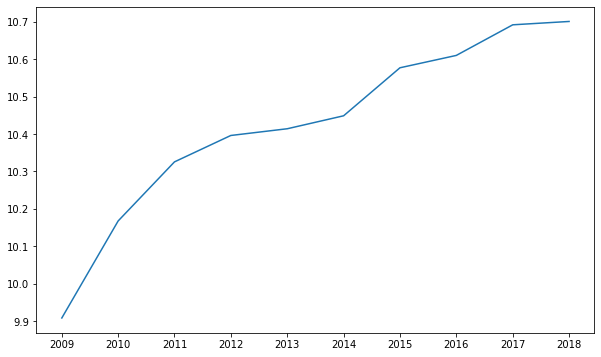

In [52]:
indexedSales_logScale=np.log(indexedSales)
plt.plot(indexedSales_logScale)
a=indexedSales_logScale

# MOVING AVERAGE

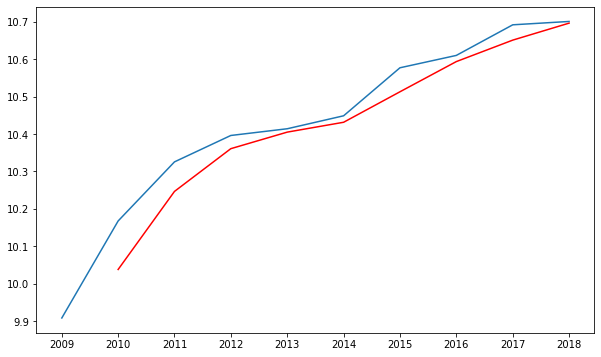

In [53]:
movingAvg=indexedSales_logScale.rolling(window=2).mean()
movingStd=indexedSales_logScale.rolling(window=2).std()
plt.plot(indexedSales_logScale)
plt.plot(movingAvg,color='red')

In [54]:
log_diff=indexedSales_logScale-movingAvg
log_diff.dropna(inplace=True)
log_diff.head(9)

,Sales
Year,
2010-01-01,0.129696
2011-01-01,0.078994
2012-01-01,0.035297
2013-01-01,0.009003
2014-01-01,0.017318
2015-01-01,0.064184
2016-01-01,0.016515
2017-01-01,0.040941
2018-01-01,0.004467


# TEST FUNCTION TO DETERMINE STATIONARITY OF DATA

In [55]:
from statsmodels.tsa.stattools import adfuller
def test(timeseries):
    #Determining Rolling Statistics
    movingAvg=timeseries.rolling(window=2).mean()
    movingStd=timeseries.rolling(window=2).std()
    
    #Plot Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAvg,color='red',label='Rolling Mean')
    std=plt.plot(movingStd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Result of Dickey-Fuller Test : ')
    dftest=adfuller(timeseries['Sales'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-Value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value %s'%key] = value
    print(dfoutput)
    
    

# STATIONARITY CHECK

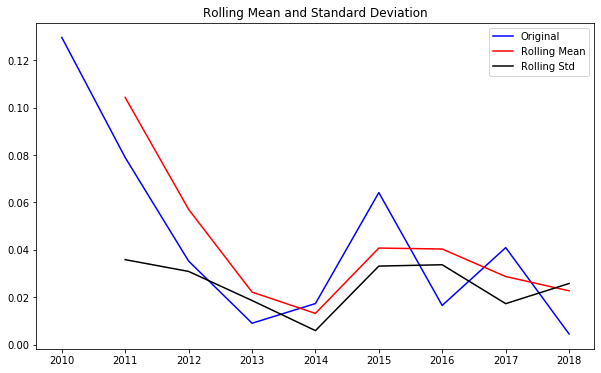

Result of Dickey-Fuller Test : 
Test Statistics               -2.905080
p-Value                        0.044760
#Lags Used                     0.000000
Number of Observations Used    8.000000
Critical Value 1%             -4.665186
Critical Value 5%             -3.367187
Critical Value 10%            -2.802961
dtype: float64


In [56]:
test(log_diff)

# EXPONENTIAL WEIGHTED AVERAGE

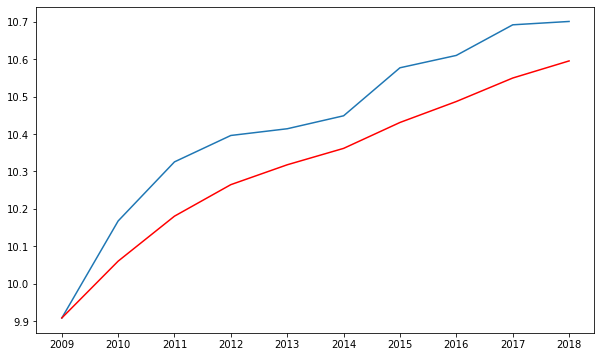

In [57]:
exponentialweightedAvg=a.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(a)
plt.plot(exponentialweightedAvg,color='red')

# STATIONARITY CHECK

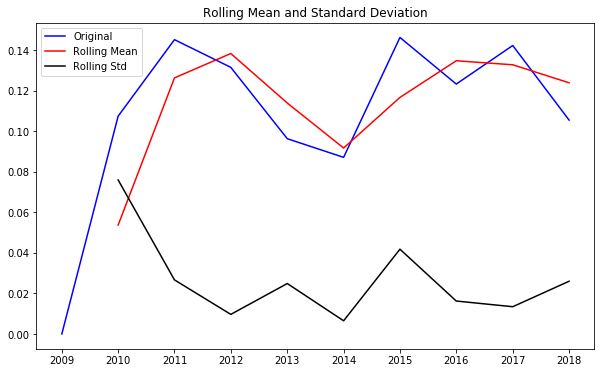

Result of Dickey-Fuller Test : 
Test Statistics               -5.194528
p-Value                        0.000009
#Lags Used                     0.000000
Number of Observations Used    9.000000
Critical Value 1%             -4.473135
Critical Value 5%             -3.289881
Critical Value 10%            -2.772382
dtype: float64


In [58]:
diff=a-exponentialweightedAvg
test(diff)

# LOG DIFFERENCE OF SALES PER YEAR

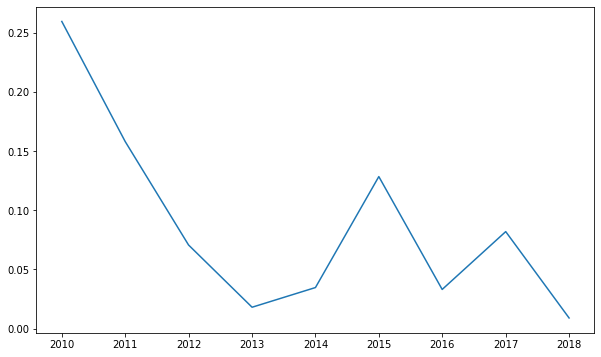

In [59]:
log_diffShifting=a-a.shift()
plt.plot(log_diffShifting)

# STATIONARITY CHECK

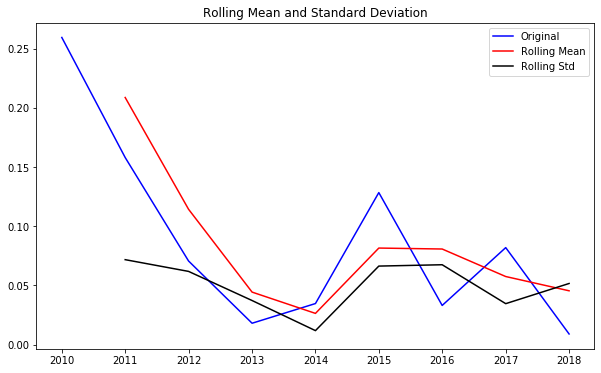

Result of Dickey-Fuller Test : 
Test Statistics               -2.905080
p-Value                        0.044760
#Lags Used                     0.000000
Number of Observations Used    8.000000
Critical Value 1%             -4.665186
Critical Value 5%             -3.367187
Critical Value 10%            -2.802961
dtype: float64


In [60]:
log_diffShifting.dropna(inplace=True)
test(log_diffShifting)

# ACF and PCF

Text(0.5, 1.0, 'Partial Autocorrelation Function')

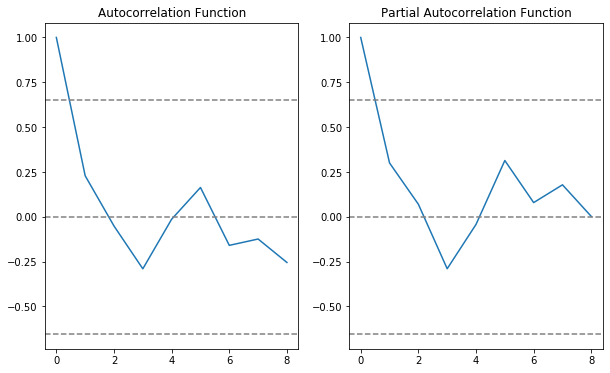

In [61]:
from statsmodels.tsa.stattools import acf,pacf
Acf=acf(log_diffShifting,nlags=8)
Pcf=pacf(log_diffShifting,nlags=8,method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(Acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diffShifting)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")

#Plot PCF
plt.subplot(122)
plt.plot(Pcf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diffShifting)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")

In [62]:
from statsmodels.tsa.arima_model import ARIMA

# AR MODEL

c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Plotting AR Model


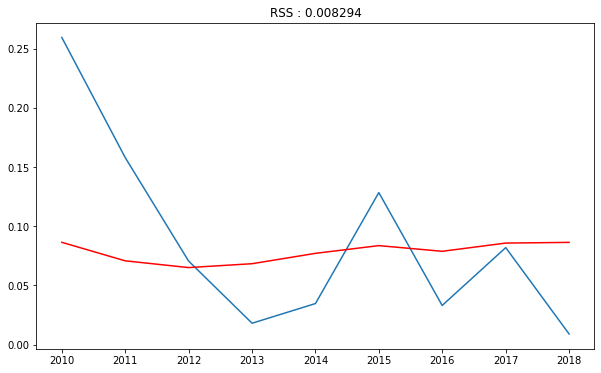

In [63]:
model=ARIMA(a,order=(1,1,1))
result_AR=model.fit(disp=-1)

plt.plot(log_diffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS : %4f'% sum(result_AR.fittedvalues-log_diffShifting['Sales'])**2)
print('Plotting AR Model')

# MA MODEL

c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Plotting MA Model


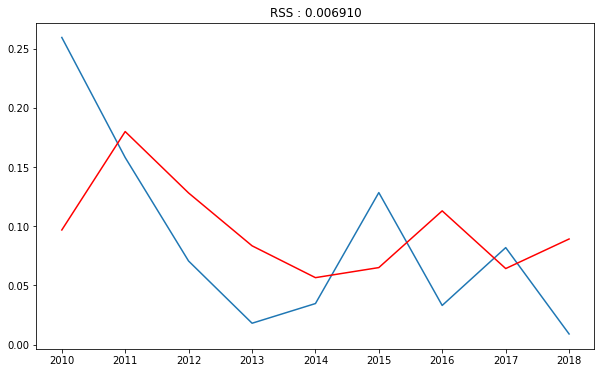

In [64]:
model=ARIMA(a,order=(1,1,0))
result_MA=model.fit(disp=-1)

plt.plot(log_diffShifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS : %4f'% sum(result_MA.fittedvalues-log_diffShifting['Sales'])**2)
print('Plotting MA Model')

# ARIMA MODEL

c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\rajat\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


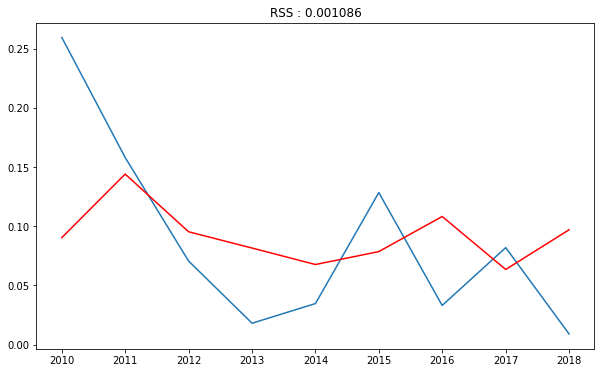

In [65]:
model=ARIMA(a,order=(0,1,1))
result_ARIMA=model.fit(disp=-1)

plt.plot(log_diffShifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS : %4f'% sum(result_ARIMA.fittedvalues-log_diffShifting['Sales'])**2)
print('Plotting ARIMA Model')

In [66]:
predictions_ARIMA_diff=pd.Series(result_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head(9))

Year
2010-01-01    0.090334
2011-01-01    0.143997
2012-01-01    0.095273
2013-01-01    0.081512
2014-01-01    0.067596
2015-01-01    0.078531
2016-01-01    0.108183
2017-01-01    0.063420
2018-01-01    0.096946
dtype: float64


In [67]:
#Conversion to Cummilative Sum
predictions_ARIMA_diffcum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diffcum.head(9))

Year
2010-01-01    0.090334
2011-01-01    0.234331
2012-01-01    0.329604
2013-01-01    0.411116
2014-01-01    0.478712
2015-01-01    0.557243
2016-01-01    0.665425
2017-01-01    0.728845
2018-01-01    0.825791
dtype: float64


In [68]:
predictions_ARIMA_log=pd.Series(a['Sales'].iloc[0],index=a.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diffcum,fill_value=0)
predictions_ARIMA_log.head(9)

Year
2009-01-01     9.908261
2010-01-01     9.998595
2011-01-01    10.142592
2012-01-01    10.237865
2013-01-01    10.319377
2014-01-01    10.386973
2015-01-01    10.465504
2016-01-01    10.573687
2017-01-01    10.637106
dtype: float64

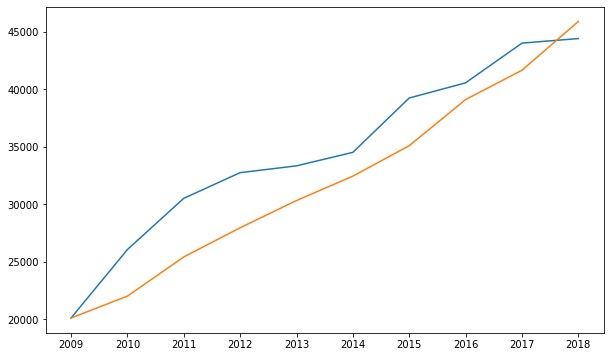

In [69]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedSales)
plt.plot(predictions_ARIMA)

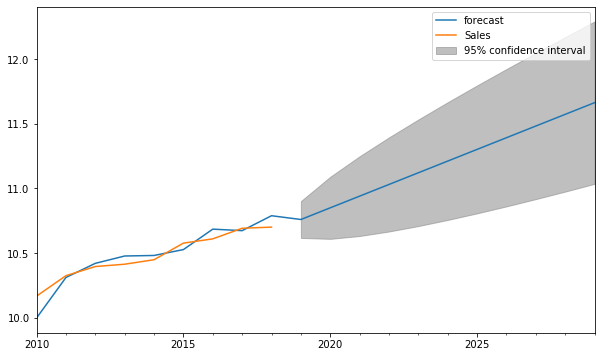

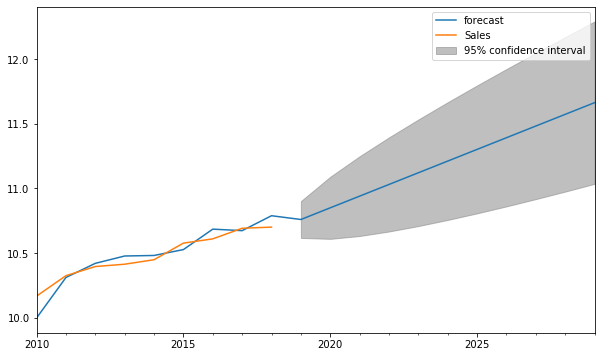

In [70]:
result_ARIMA.plot_predict(1,20)

In [71]:
x=result_ARIMA.forecast(steps=10)
print((x[1]))

[0.07262517 0.12248755 0.15726407 0.18563613 0.21021313 0.23220324
 0.25228384 0.2708799  0.28827887 0.30468589]


In [72]:
z=(x[1])
y=[]
for d in z:
    y.append(d+10.7)
print(y)

[10.772625165233602, 10.822487554832396, 10.857264069489602, 10.885636133379366, 10.910213131082845, 10.93220324490253, 10.952283835009055, 10.970879899347455, 10.988278869038469, 11.004685892022769]


In [73]:
Sales_in_next_10_years=np.exp(y)
print(Sales_in_next_10_years)

[47697.06598488 50135.64719059 51909.86195428 53403.74392146
 54732.50926081 55949.41427161 57084.26765545 58155.74209593
 59176.44593845 60155.36385194]


In [74]:
Years=['2019-01','2020-01','2021-01','2022-01','2023-01','2024-01','2025-01','2026-01','2027-01','2028-01']
df=pd.DataFrame(Sales_in_next_10_years)
df['Year']=Years
df.columns=['Sales','Year']
df['Year']=pd.to_datetime(df['Year'],infer_datetime_format=True)
df1=df.set_index(['Year'])
df1.head(10)

,Sales
Year,
2019-01-01,47697.065985
2020-01-01,50135.647191
2021-01-01,51909.861954
2022-01-01,53403.743921
2023-01-01,54732.509261
2024-01-01,55949.414272
2025-01-01,57084.267655
2026-01-01,58155.742096
2027-01-01,59176.445938


Text(0.5, 1.0, 'SALES IN NEXT 10 YEARS')

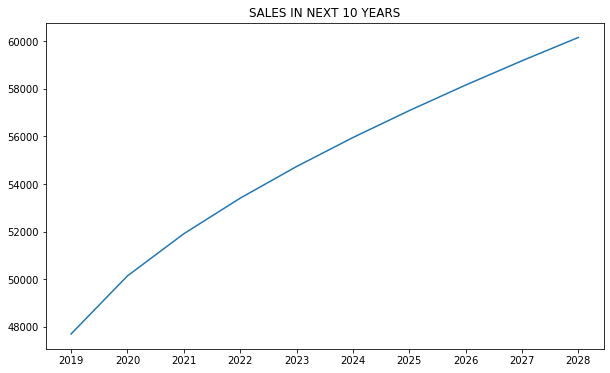

In [75]:
plt.plot(df1)
plt.title('SALES IN NEXT 10 YEARS')

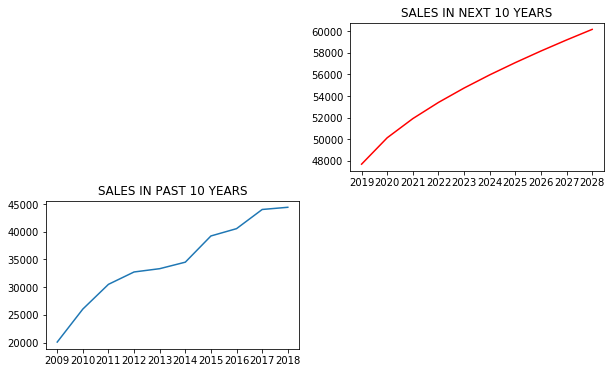

In [76]:
plt.subplot(222)
plt.plot(df1,color='red')
plt.title('SALES IN NEXT 10 YEARS')
plt.subplot(223)
plt.plot(indexedSales)
plt.title('SALES IN PAST 10 YEARS')
plt.show()

In [77]:
df2=pd.concat([indexedSales,df1])

Text(0.5, 1.0, 'SALES IN PAST 10 YEARS AND NEXT 10 YEARS')

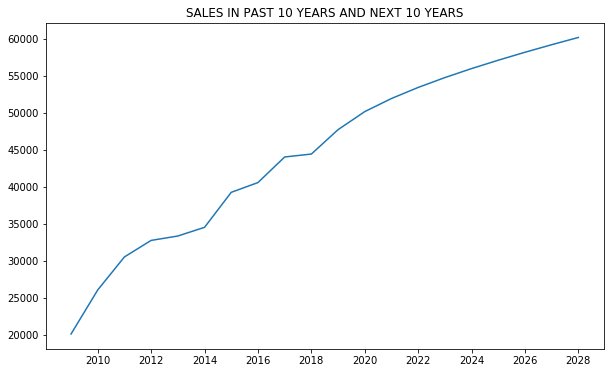

In [78]:
plt.plot(df2)
plt.title('SALES IN PAST 10 YEARS AND NEXT 10 YEARS')